# Exploratory Data Analysis of House Price Prediction


## Study of variables

First we will import the necessary packages and load the data set.

In [1]:
import boto3
import awswrangler as wr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

#statistics
from scipy import stats
from scipy.stats import norm, skew 

Lets read the train and test data.

In [3]:
boto3.setup_default_session()
ssm = boto3.client('ssm')
parameter = ssm.get_parameter(Name='/datafy-samples/bucket/name')
bucket = parameter['Parameter']['Value']

df = wr.s3.read_csv(path=f"s3://{bucket}/housing/raw/train.csv")

In [5]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Above is the training data set of housing price problem. It has 1460 rows (number of houses), and 81 columns (data about the houses) including the target variable "SalePrice".

Let us first look at the columns of the data and then we use describe() and info() methods to get a basic idea of what we have in hand.

In [6]:
cols = df.columns
cols

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Using info() method, we get the Dtype of the data, Non-null count and memory usage.

From this initial analysis we can already conclude there are many variables in this dataset. So let's start looking at the target.

# Target Variable Analysis

The first thing we see when we are buying a house is the Living Area. So lets anlayse the Living area with our target variable SalePrice first.

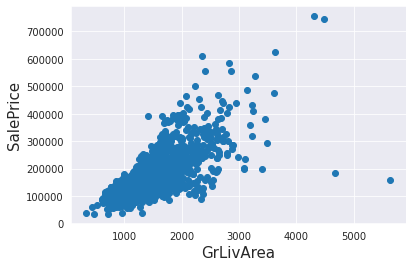

In [13]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

From the above plot, the Living area and Sale Price has a linear relationship.

The two dots on the top shows the sudden increase in price. It may be because of the house located in the hot spot of the city.

Also note the two dots on the right side where the GrLivingArea is more and the SalePrice is very less. It could be the agricultural land nearby the city. But if you analyse the data carefully, these two points doesnt fit in here. These are called Outliers. If we feed these data to our model, definitely the model will not perform well. And hence we should carefully delete these outliers before modeling.

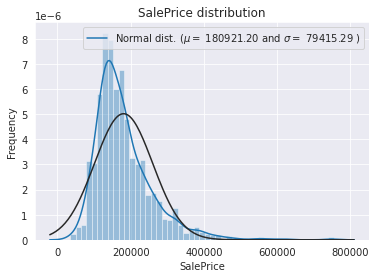

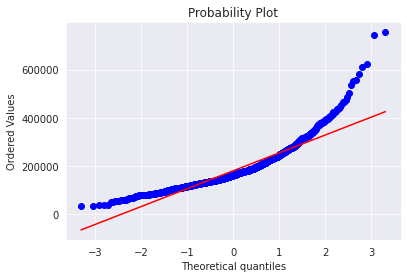

In [15]:
sns.distplot(df['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(df['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

As we can see in the graph, the data is not normally distributed. The linear regression model we use needs the data to be normally distributed. Hence we need to transform the variable to normal distribution.

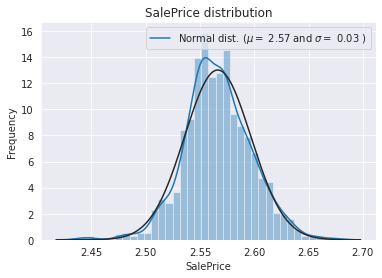

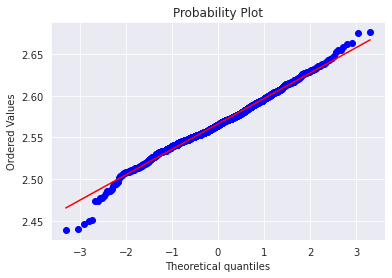

In [18]:
df["SalePrice"] = np.log1p(df["SalePrice"])
 
sns.distplot(df['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(df['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

We have just done log transformation to the 'SalePrice' variable.

Before moving further into data cleaning and modeling, lets combine the test and train data so that we do not need to clean the data twice.

# Null and Missing Values Study

First lets find the missing values in the dataset.

In [20]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(15)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


Lets look at the top five rows of the data which has more missing values. The PoolQC, MiscFeature, Alley, Fence and FireplaceQu. All these data seems unwated in predicting the house prices. But we are not going to drop them. Lets just fill the missing values with 0 or None and proceed with modeling.

Now lets plot the missing values.

Text(0.5, 1.0, 'Percent missing data by feature')

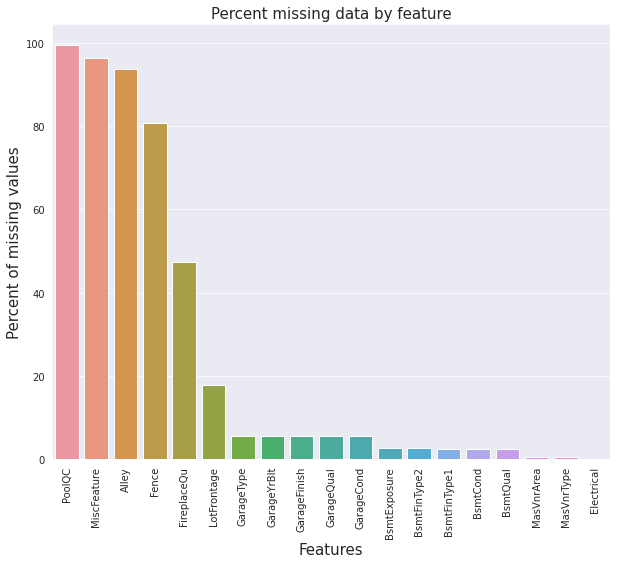

In [21]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

# Data Cleaning

Lets clean the missing values of the top five by filling the empty values with "None".

In [22]:
df["PoolQC"] = df["PoolQC"].fillna("None")
df["MiscFeature"] = df["MiscFeature"].fillna("None")
df["Alley"] = df["Alley"].fillna("None")
df["Fence"] = df["Fence"].fillna("None")
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

Next is LotFrontage. The dtype of LotFrontage is float. Hence we cannot fill None for missing values. In general the LotFrontage of a house is mostly equal to the Neighborhood houses. Hence we group the data by "Neighborhood" and fill the missing values with median value of the neighborhood houses.

In [23]:
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

Now filling the missing values in 'GarageType', 'GarageFinish', 'GarageQual' and 'GarageCond' with "None"

In [24]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

The dtype of the 'GarageYrBlt', 'GarageArea' and 'GarageCars' are integer. Hence we are filling the missing values with 0.

In [25]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

Now lets see the variables related to Basement. The dtype of 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath' and 'BsmtHalfBath' are all float. Hence we fill the missing values with 0.

In [26]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

The other variables related to Basement are 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1' and 'BsmtFinType2' which are categorical. Lets fill the missing values with "None"

In [27]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

Next we take the Type and Area masonry veneer. Lets fill 0 for missing value in area and "None" for missing value in type.

In [28]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

Now lets fill the missing values of the MSZoning with the most common value.

In [29]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

If we look at the 'Utilities' column, almost all the column has the same value "AllPub", which means this variable is not going to help in prediction. Hence we drop this column.

In [30]:
df = df.drop(['Utilities'], axis=1)

Lets fill the NA values of "Functional" column with Typical.

In [31]:
df["Functional"] = df["Functional"].fillna("Typ")


Now we fill the missing values in 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd' and 'SaleType' with the most frequent value.

In [32]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

Finally we fill the missing value in 'MSSubClass' with "None"

In [33]:
df['MSSubClass'] = df['MSSubClass'].fillna("None")

Now lets check whether there are any more missing value present in the dataset.

In [35]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


Done! There are no missing values present in the dataset.

Now we change datatype of some objects to str.

In [36]:
df['MSSubClass'] = df['MSSubClass'].apply(str)

df['OverallCond'] = df['OverallCond'].astype(str)

df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

Since "Area" plays important role in predicting the price, lets create a new column that contains the total area of the house including basement, first floor and second floor.

In [37]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [38]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,None,None,None,0,2,2008,WD,Normal,2.583824,2566
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,None,None,None,0,5,2007,WD,Normal,2.573300,2524
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,None,None,None,0,9,2008,WD,Normal,2.589054,2706
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,None,None,None,0,2,2006,WD,Abnorml,2.553297,2473
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,None,None,None,0,12,2008,WD,Normal,2.597433,3343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,Inside,...,None,None,None,0,8,2007,WD,Normal,2.570514,2600
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,Inside,...,None,MnPrv,None,0,2,2010,WD,Normal,2.584365,3615
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,Inside,...,None,GdPrv,Shed,2500,5,2010,WD,Normal,2.602181,3492
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,Inside,...,None,None,None,0,4,2010,WD,Normal,2.554469,2156


Thats all about data cleaning. 

# Correlation Study

We have 80 columns in our data set. Visualizing all the data takes a lot of time. We just try to analyse the variables which are highly correlated (both positive and negative) with our target variable "SalePrice".

In [39]:
corrmat = df.corr()

def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    for i , index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    df2 = pd.DataFrame(data = value, index=feature, columns=['corr value'] )
    return df2

corr_df = getCorrelatedFeature(corrmat['SalePrice'], 0.5)
corr_df

,corr value
OverallQual,0.815005
YearBuilt,0.587947
YearRemodAdd,0.566811
TotalBsmtSF,0.609138
1stFlrSF,0.593533
GrLivArea,0.697001
FullBath,0.593950
TotRmsAbvGrd,0.532015
GarageCars,0.680156
GarageArea,0.649601


We just got all the variables which are highly correlated with our target variable. Now lets look at the values of the correlated data.

In [40]:
correlated_data = df[corr_df.index]
correlated_data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,TotalSF
0,7,2003,2003,856,856,1710,2,8,2,548,2.583824,2566
1,6,1976,1976,1262,1262,1262,2,6,2,460,2.573300,2524
2,7,2001,2002,920,920,1786,2,6,2,608,2.589054,2706
3,7,1915,1970,756,961,1717,1,7,3,642,2.553297,2473
4,8,2000,2000,1145,1145,2198,2,9,3,836,2.597433,3343


Lets look at the heatmap of the correlated data for a better picture.

<AxesSubplot:>

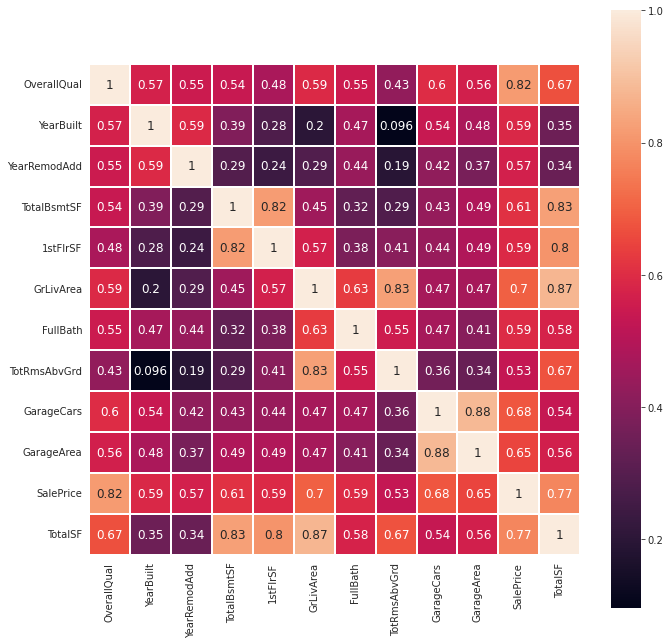

In [41]:
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(correlated_data.corr(), annot = True, annot_kws={'size': 12}, square=True, linecolor='w', linewidths=0.1)

From the above heatmap, GrageArea seems highly correlated with our target variable.

# Bivariate Analysis

Since GarageArea is highly correated with traget variable, lets analyse it first.

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

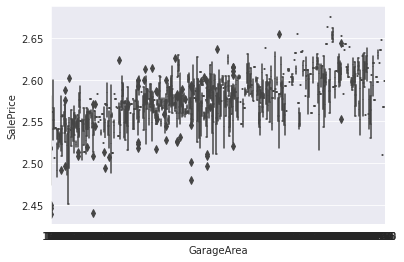

In [44]:
sns.boxplot(y='SalePrice', x = 'GarageArea', data=df)

We can see a trend in data. The above plot clearly shows a linear relationship betweeb SalePrice and GarageArea. The SalePrice increases when the GarageArea increase.

Now lets analyse the next variable OverallQual since it is highly correlated with our target variable.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

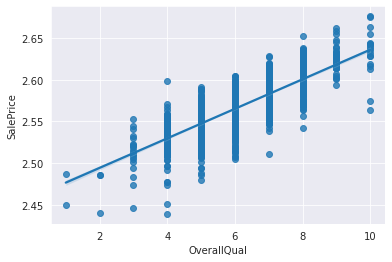

In [46]:
sns.regplot(x='OverallQual', y='SalePrice', data=df, robust=True)

Obviously there is a linear relationship between OverallQual and SalePrice. 

Now we analyse YearBuilt along with SalePrice.

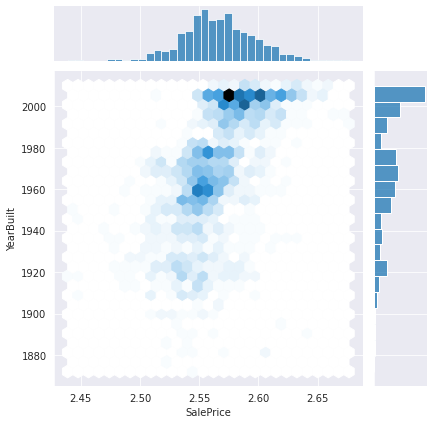

In [48]:
sns.jointplot(x='SalePrice', y='YearBuilt', data=df, kind='hex')

Here also we can clearly see a linear trend.

Next we analyse TotalBsmtSF.

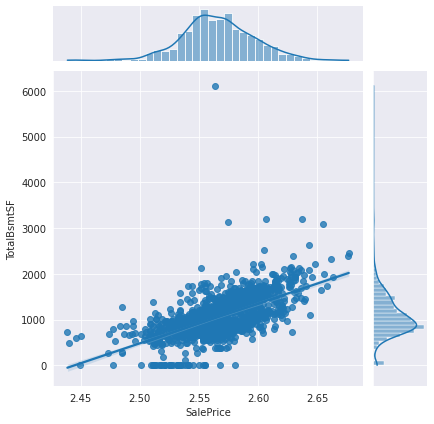

In [49]:
sns.jointplot(x='SalePrice', y='TotalBsmtSF', data=df, kind='reg')

TotalBsmtSF is very highly correlated with our target variable SalePrice and also it follows a linear trend.

Next we analyse GarageYrBlt.

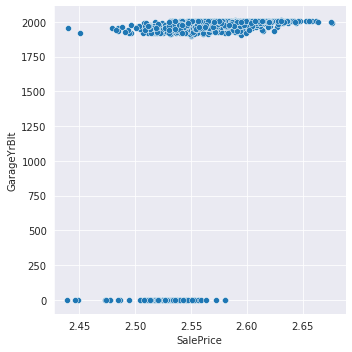

In [50]:
sns.relplot(x='SalePrice', y='GarageYrBlt', data=df)

As you can see in the above plot GarageYrBlt is also highly negatively correlated with target variable and hence we couldnt see any trend in the data.

Next we analyse GrLivArea with SalePrice.

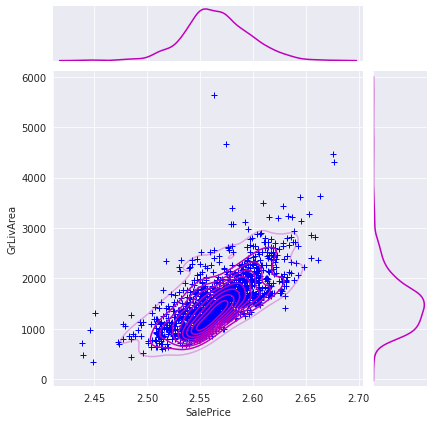

In [51]:
g = sns.jointplot(x='SalePrice', y='GrLivArea', data=df, kind='kde', color='m')
g.plot_joint(plt.scatter, color='b', s=40, linewidth=1, marker='+' )
g.ax_joint.collections[0].set_alpha(0.3)

Here also we can see the linear trend in data. When the GrLivArea increases, the SalePrice increases.

Now lets analyse TotRmsAbvGrd with SalePrice.

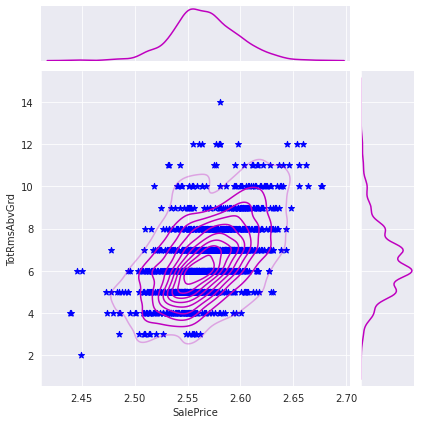

In [52]:
g = sns.jointplot(x='SalePrice', y='TotRmsAbvGrd', data=df, kind='kde', color='m')
g.plot_joint(plt.scatter, color='b', s=40, linewidth=1, marker='*' )
g.ax_joint.collections[0].set_alpha(0.3)

From the above plot, we could see a slight linear trend.

Next we analyse our next variable 'YearRemodAdd'.

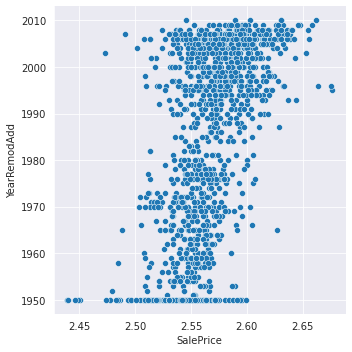

In [53]:
sns.relplot(x='SalePrice', y='YearRemodAdd', data=df)

If you see the above plot, the YearRemodAdd also has a linear relationship with SalePrice.

Now we analyse the next variable 'FullBath'

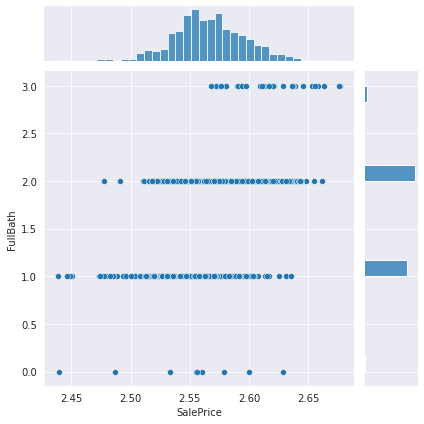

In [54]:
sns.jointplot(x='SalePrice', y='FullBath', data=df)

If you see here, there is no trend in data. It is highly negatively correlated with our target variable. But this helps the model to predict better.

# Multivariate Analysis

We have already analysed OverallQual with SalePrice. Now lets include the third variable GarageCars and see if there is any change in trend in the data.

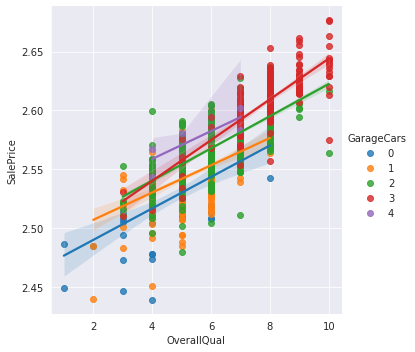

In [55]:
sns.lmplot(x='OverallQual', y='SalePrice', data=df, hue= 'GarageCars')

We can see a linear trend in the data. Lets print the plots seperately to have a better picture of the data.

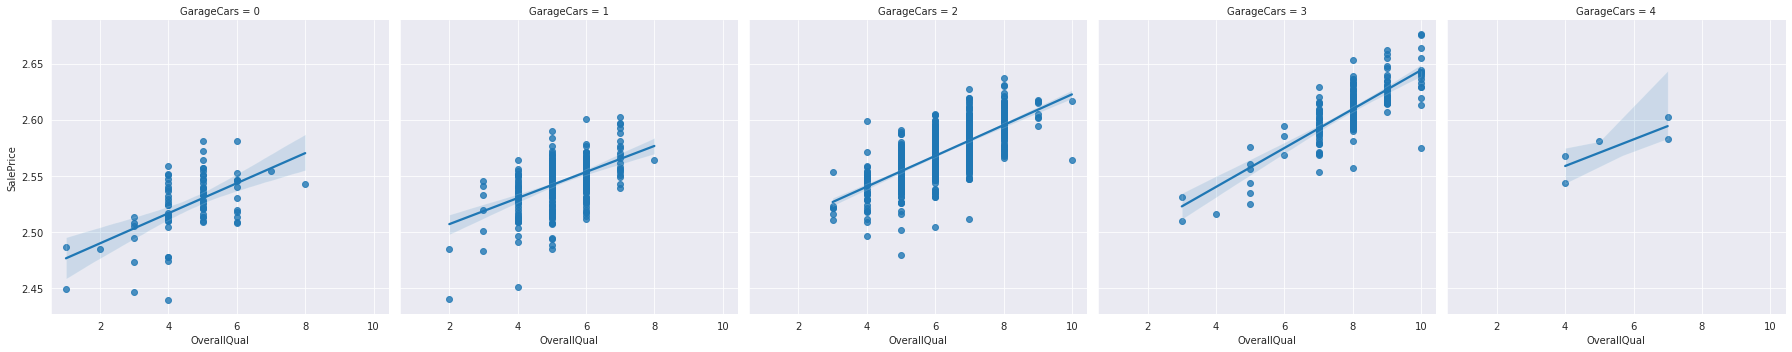

In [56]:
sns.lmplot(x='OverallQual', y='SalePrice', data=df, col='GarageCars')

We have come to the end of my Exploratory Analysis.